SyntaxError: invalid syntax (<ipython-input-2-5aba3fb3f37f>, line 1)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shilongzhuang/telecom-customer-churn-by-maven-analytics

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
import pandas as pd

!gdown --id 1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr -O dataset.csv

data = pd.read_csv('dataset.csv')
data

print('Some information about dataset:', data.info())

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr
To: /content/dataset.csv
100% 1.44M/1.44M [00:00<00:00, 39.0MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip

In [ ]:
data = data.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns')

#colms that have unique value and nothing can be learned from this
data = data.drop(['customer_id', 'city', 'zip_code', 'latitude', 'longitude'], axis=1)

#dropping colms as they happen after churning happens(not req)
data = data.drop(['churn_category', 'churn_reason'], axis=1)
data.duplicated().sum()

np.int64(0)

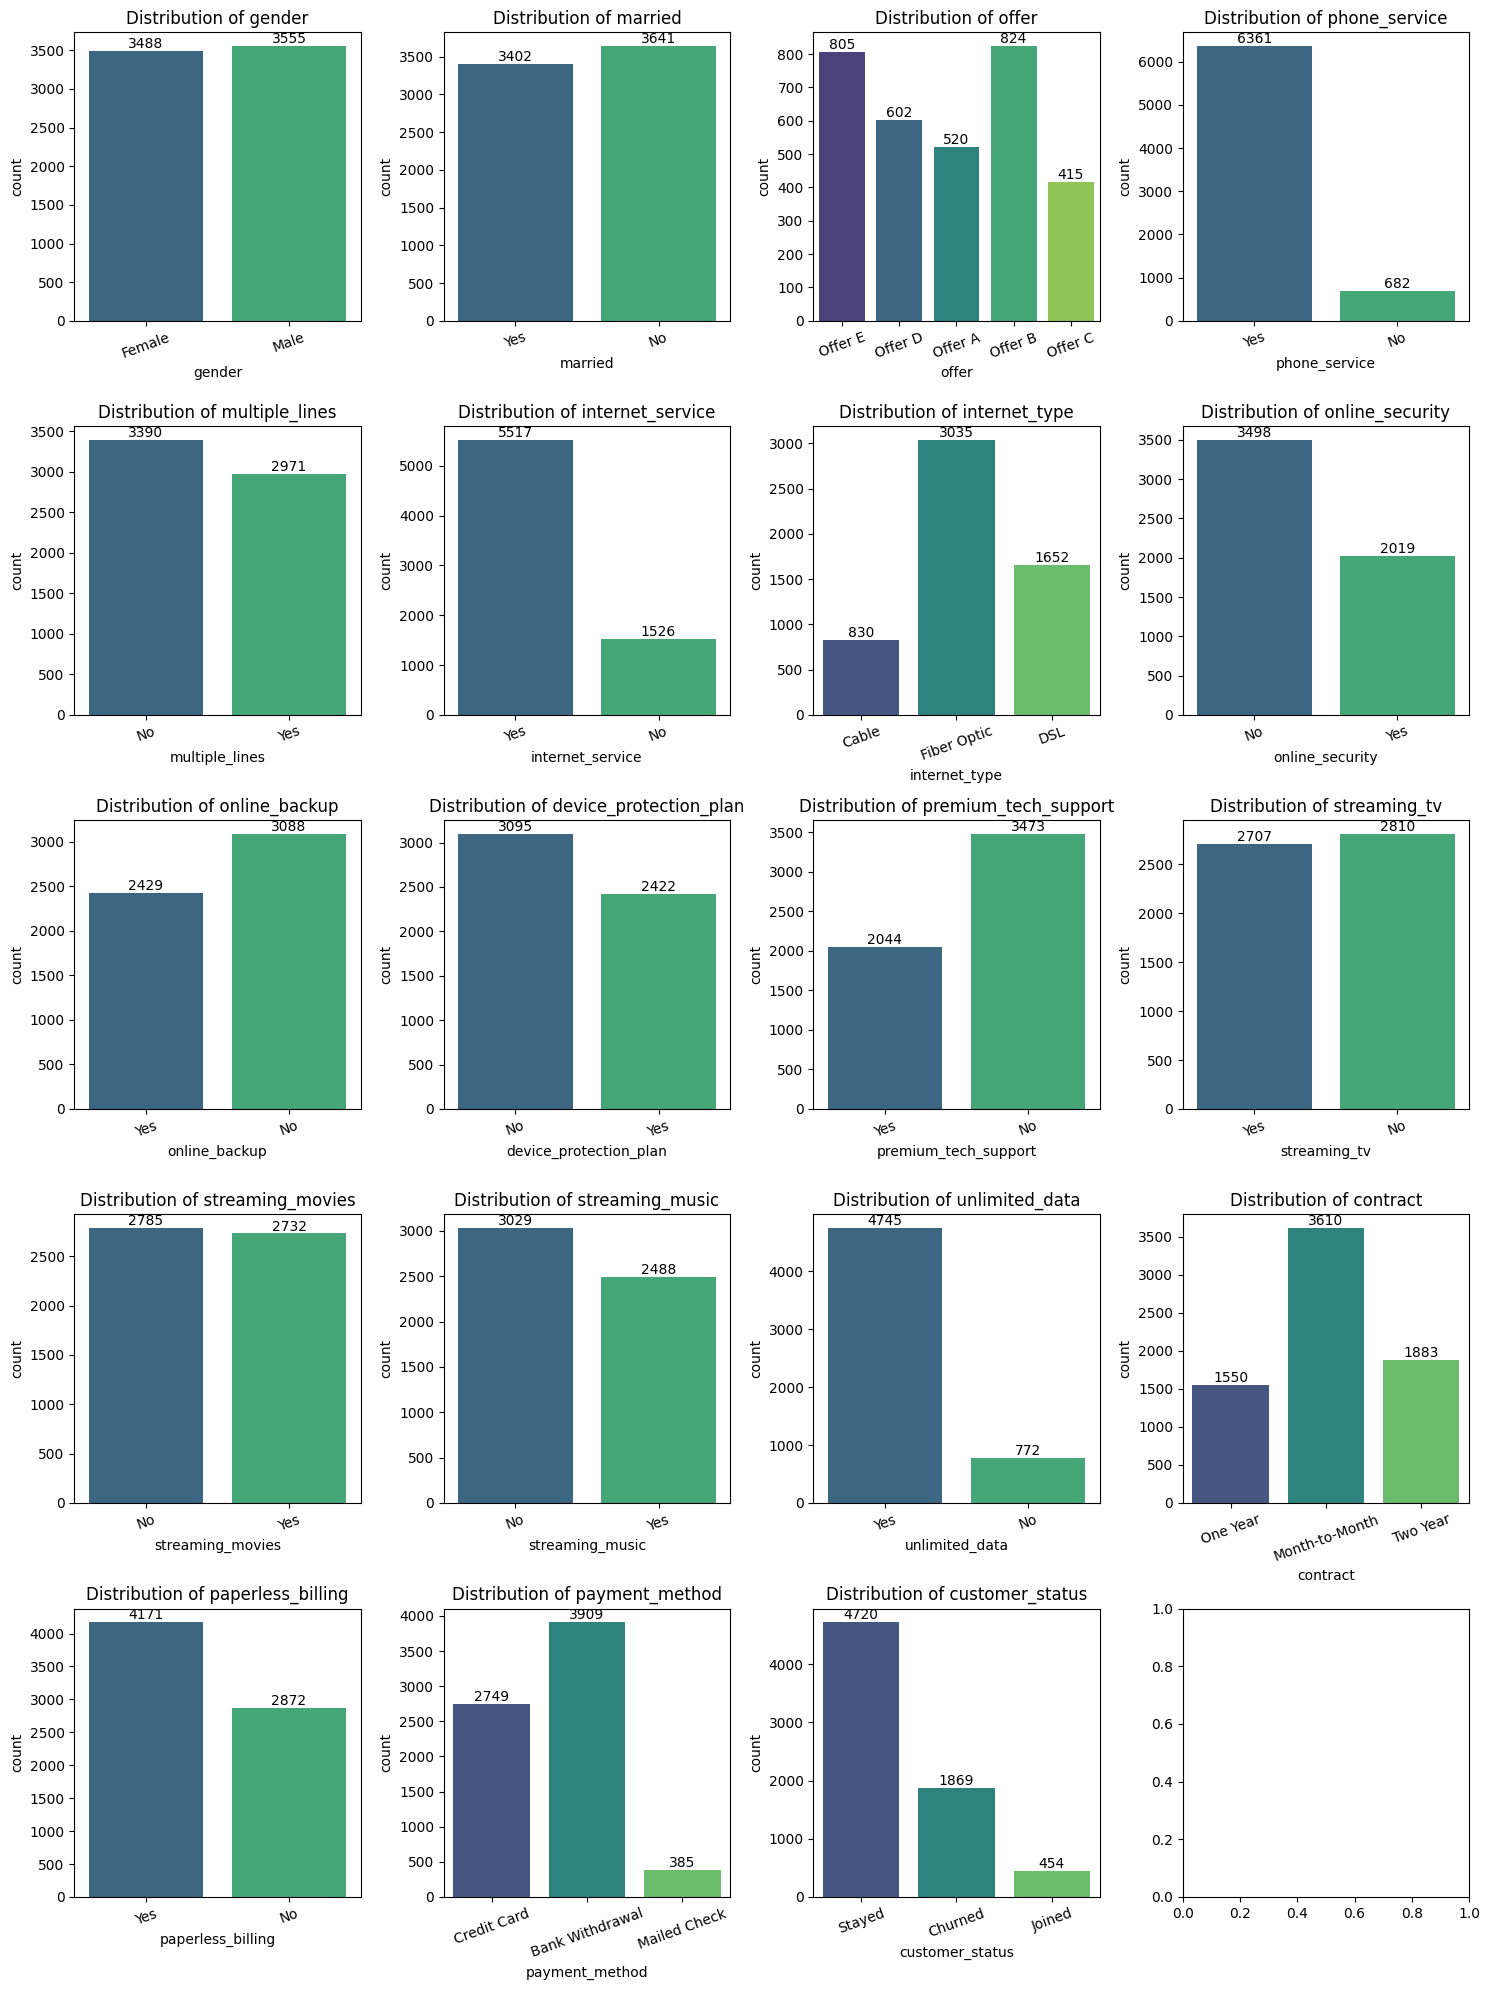

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 4, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

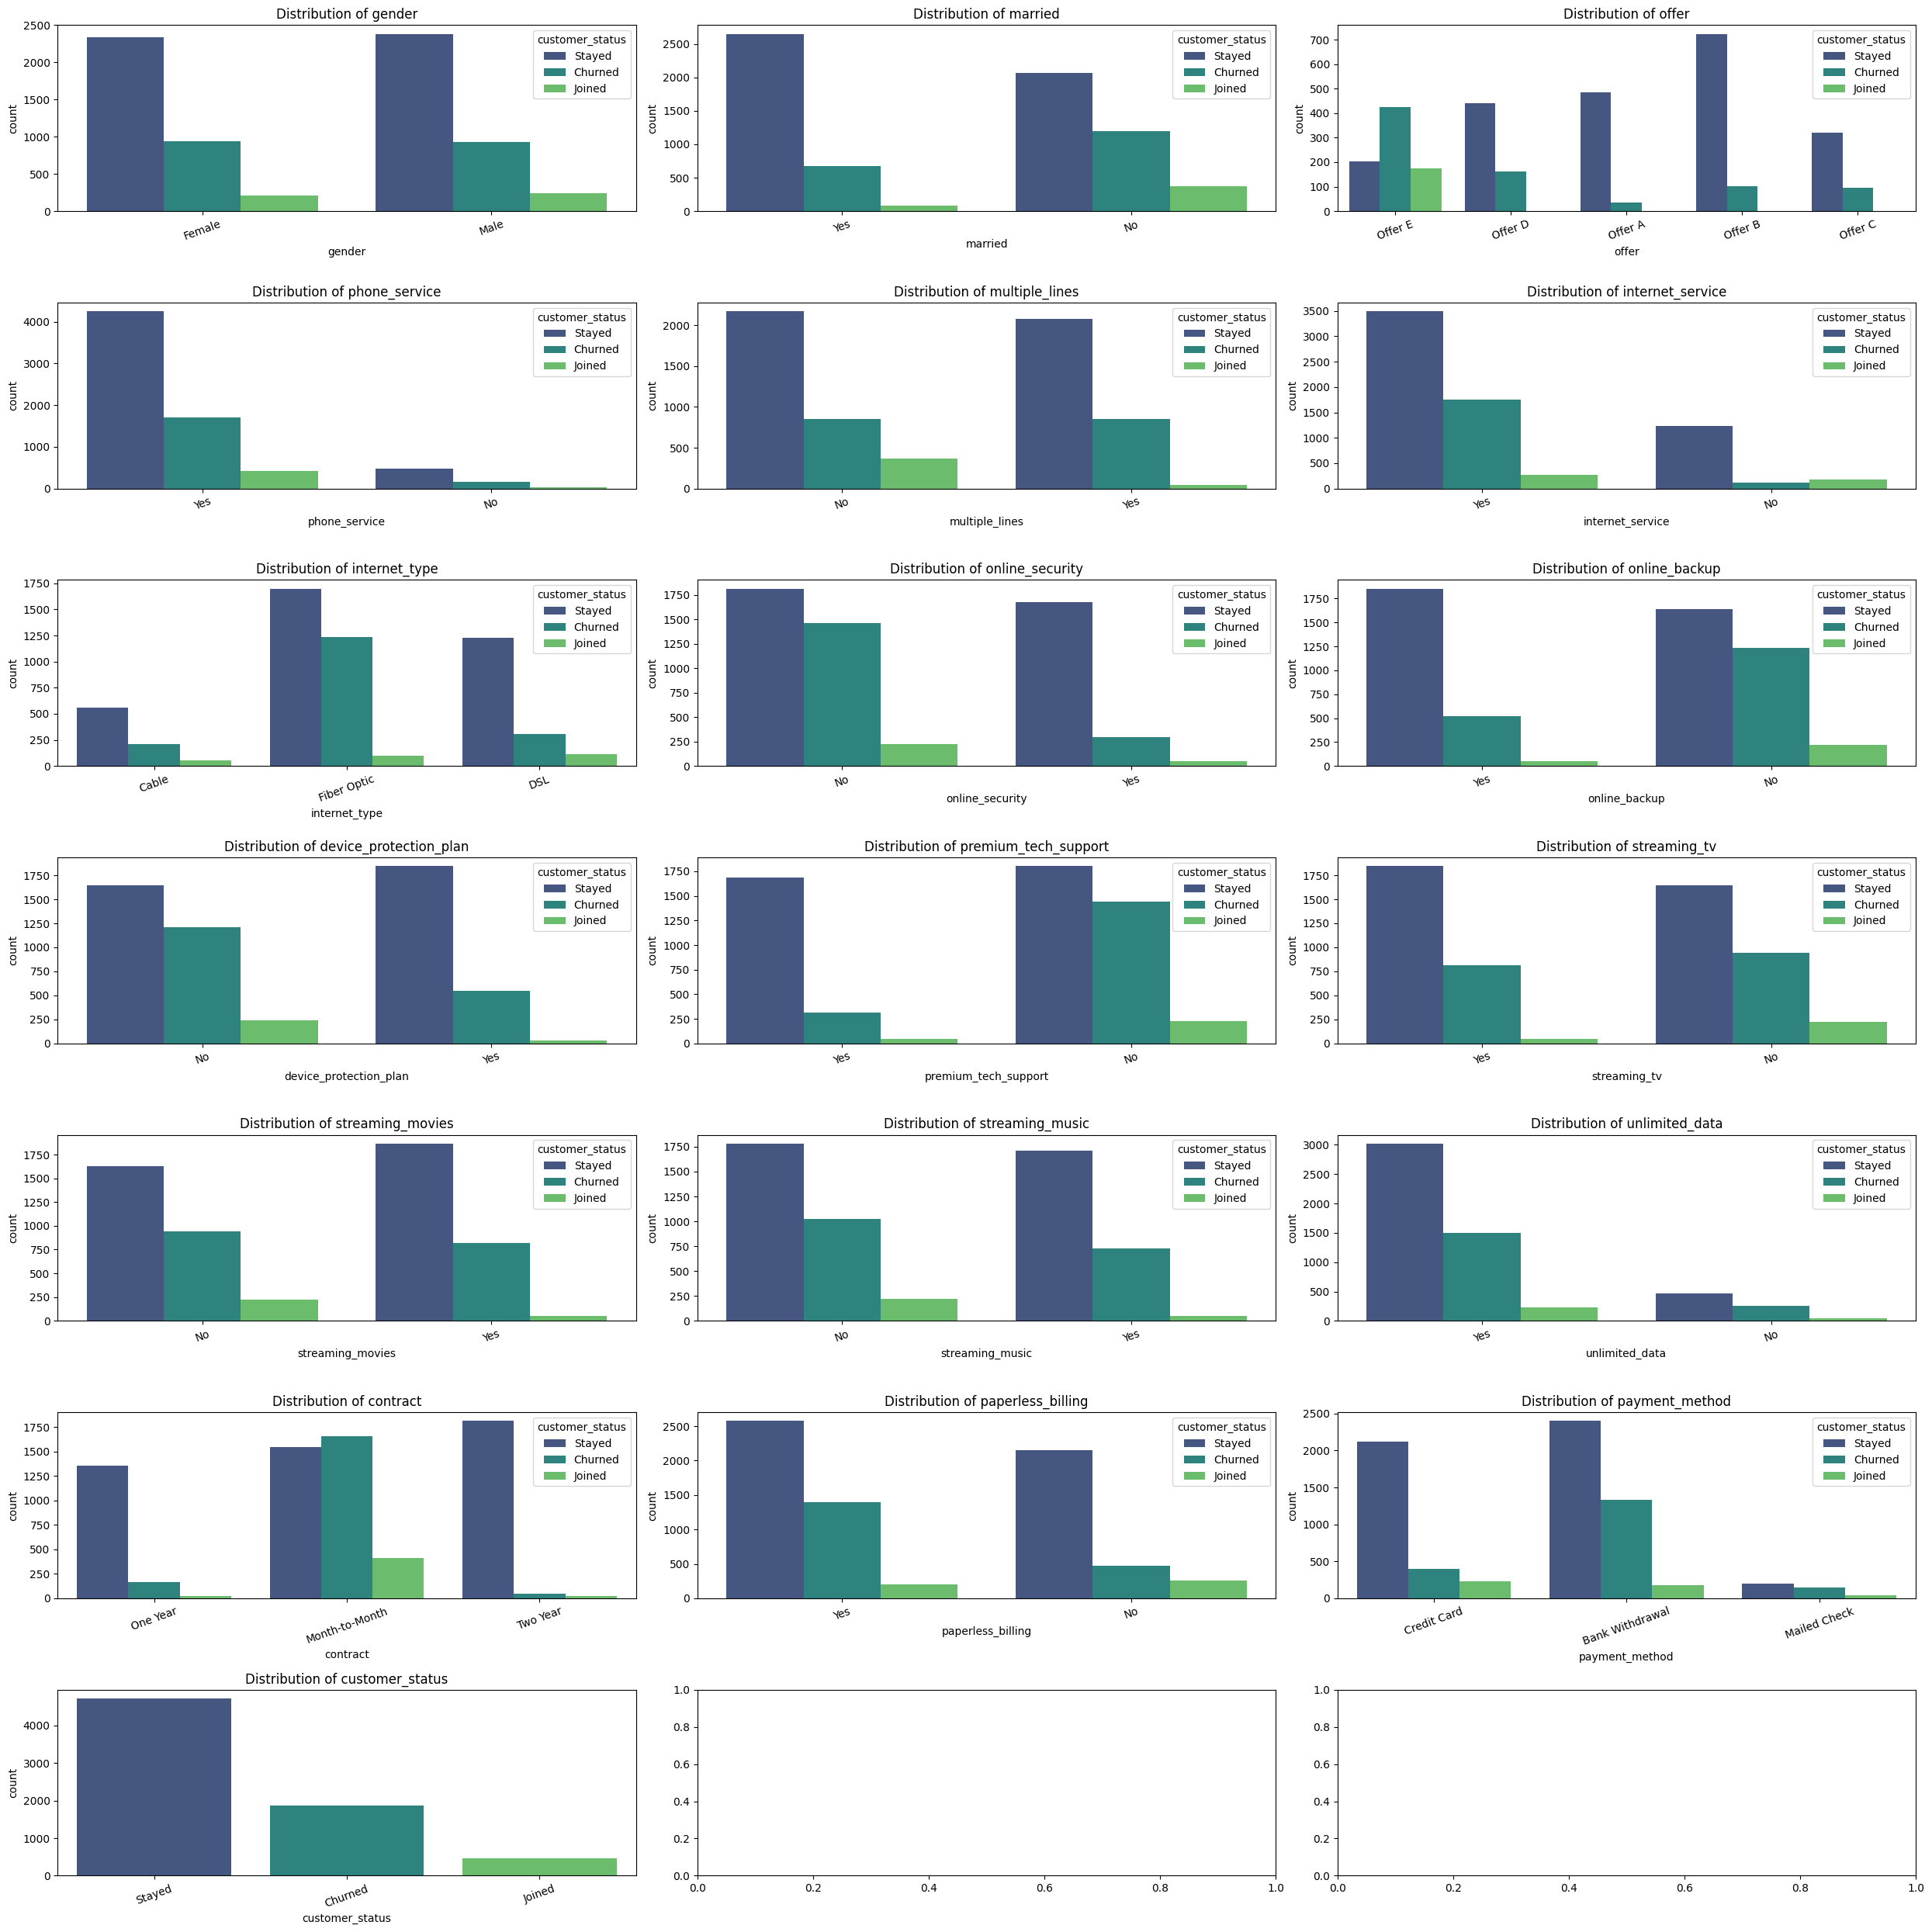

In [ ]:


import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(7, 3, figsize=(25, 25))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    if 'customer_status' in data.columns:
        sns.countplot(x=col, data=data, hue='customer_status', ax=axes[i], palette='viridis')
    else:
        print(f"Warning: 'customer_status' column not found. Skipping countplot for {col}")
        continue

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()

In [ ]:
data.describe(include='O').T

,count,unique,top,freq
gender,7043,2,Male,3555
married,7043,2,No,3641
offer,3166,5,Offer B,824
phone_service,7043,2,Yes,6361
multiple_lines,6361,2,No,3390
internet_service,7043,2,Yes,5517
internet_type,5517,3,Fiber Optic,3035
online_security,5517,2,No,3498
online_backup,5517,2,No,3088
device_protection_plan,5517,2,No,3095


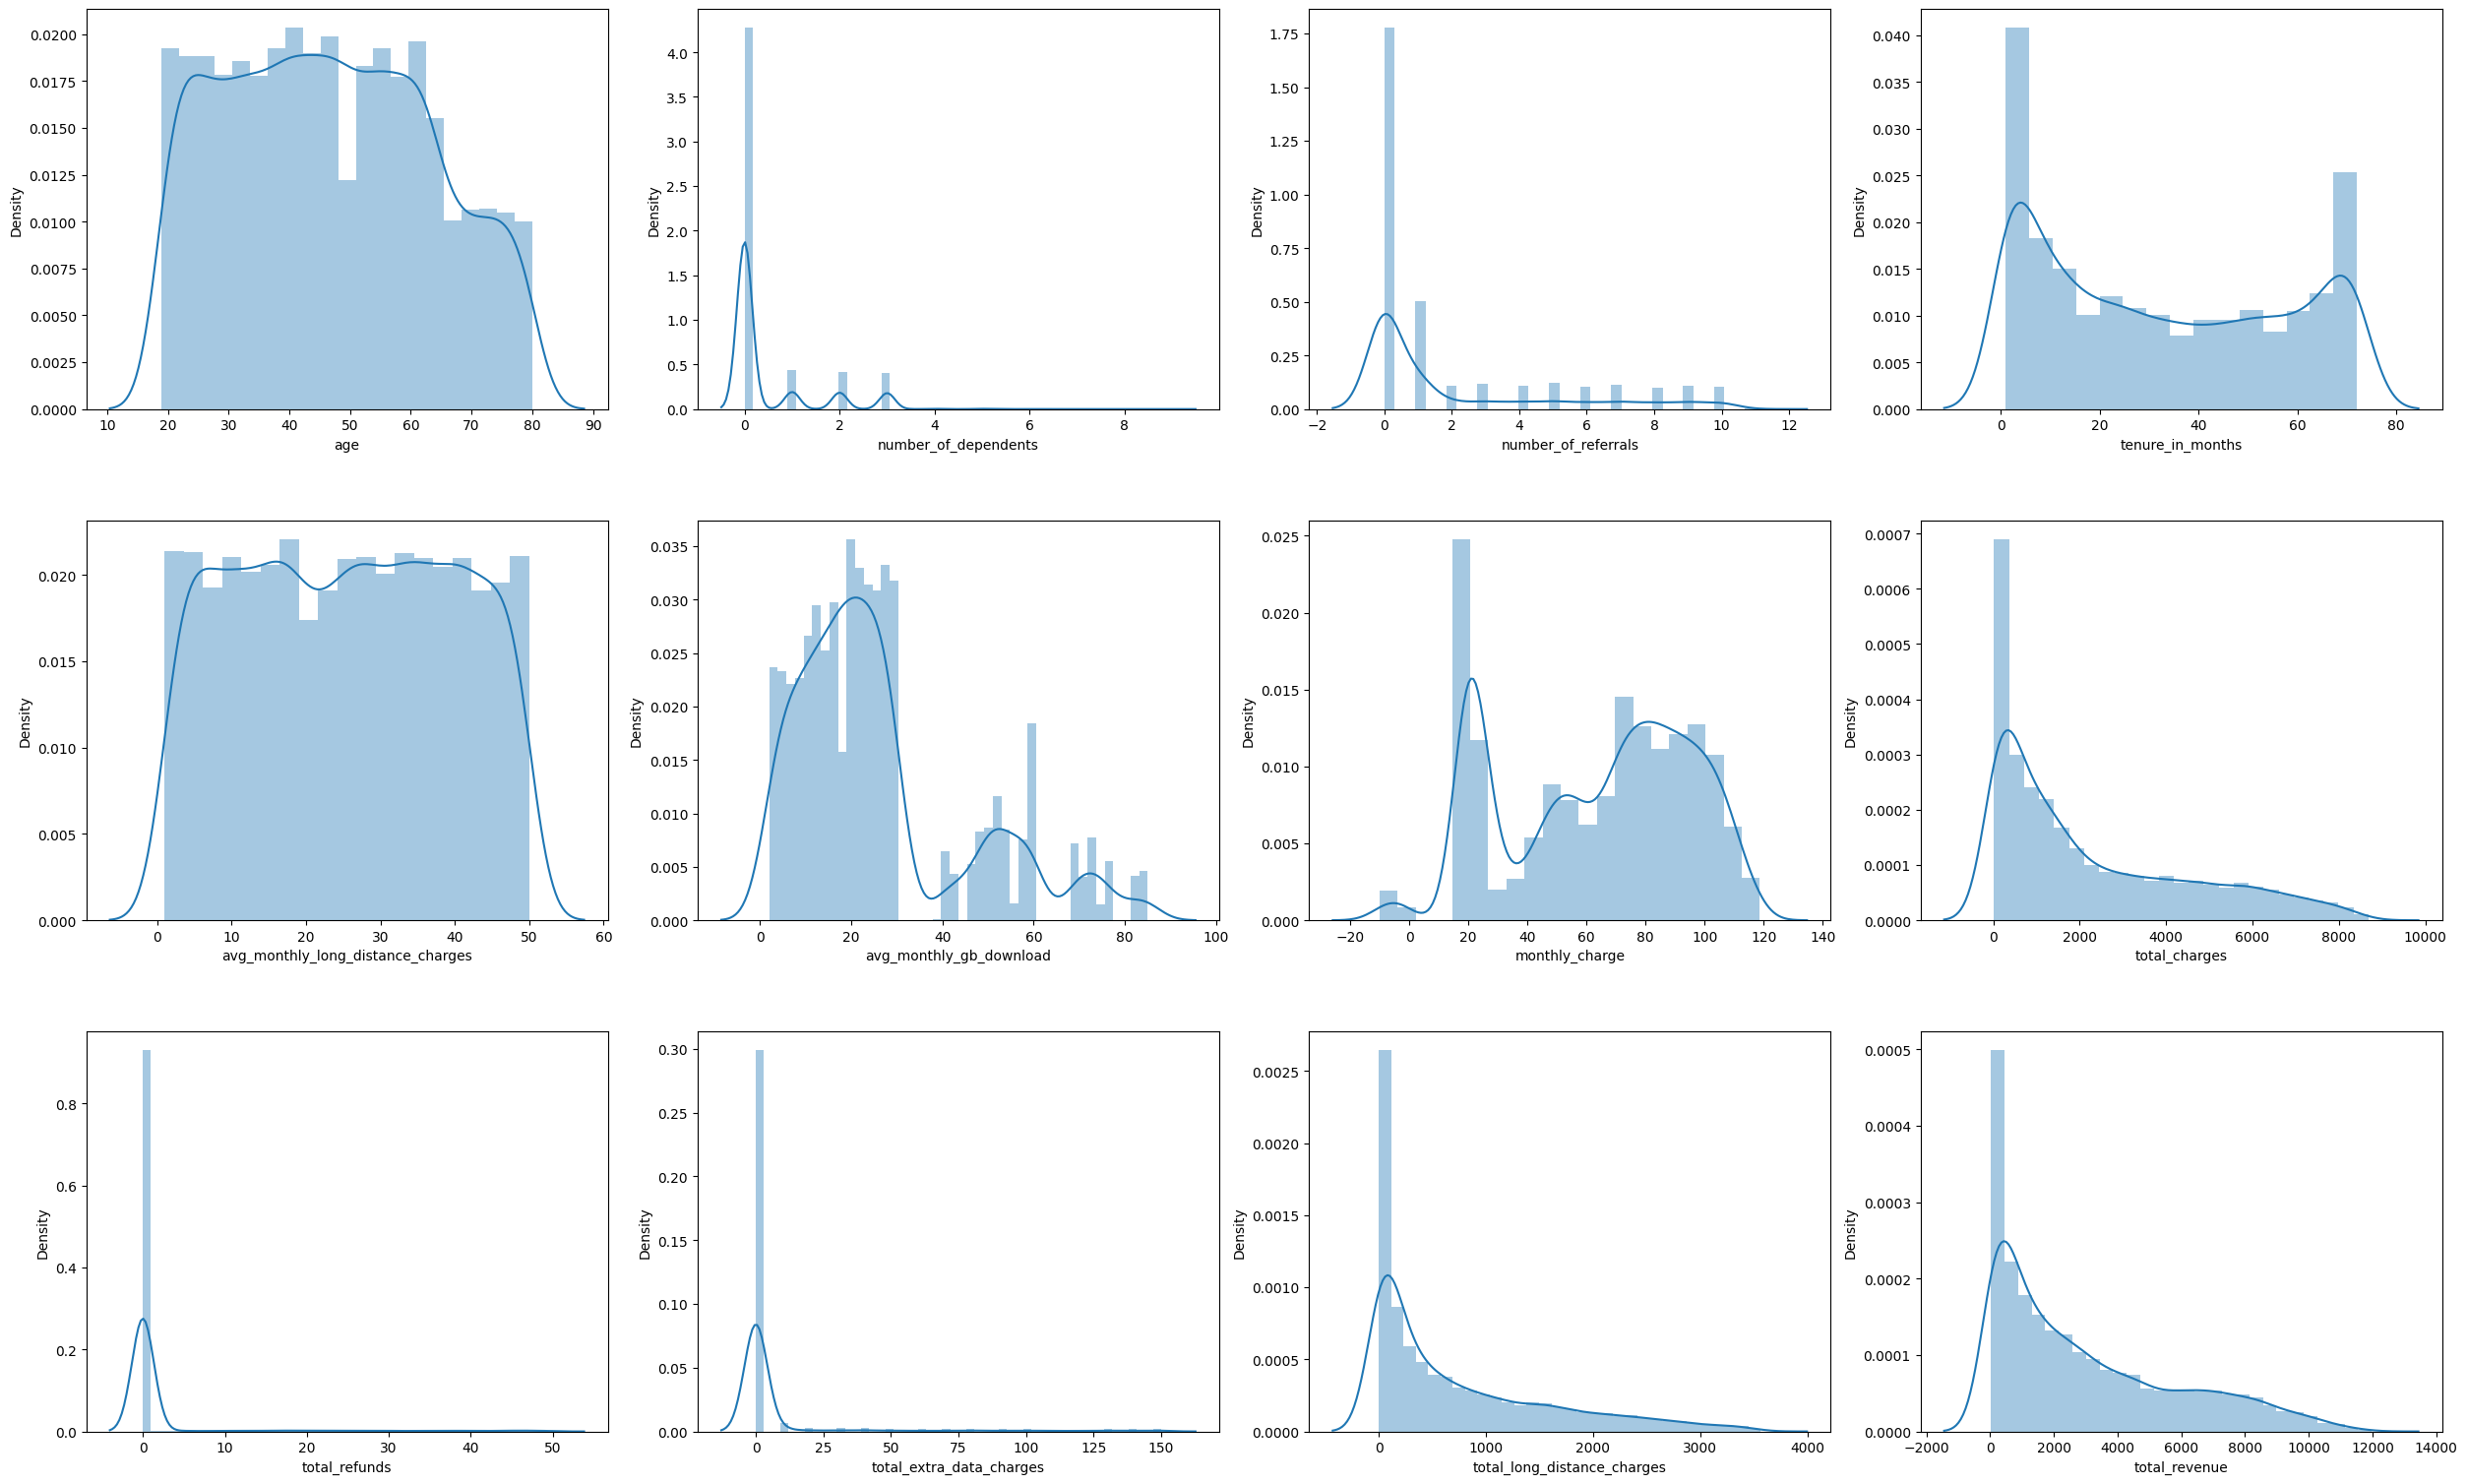

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,15))
index = 0
axs = axs.flatten()
for k, v in data.select_dtypes(include=['number']).items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

In [ ]:
from scipy.stats import trim_mean

groupby_columns = ['age', 'monthly_charge', 'total_charges', 'total_revenue', 'total_refunds']

# using groupby
groupby_result = data.groupby('customer_status')[groupby_columns].agg(lambda x: trim_mean(x, 0.05))

# Display the result
print("Groupby:")
groupby_result

Groupby:


,age,monthly_charge,total_charges,total_revenue,total_refunds
customer_status,,,,,
Churned,49.749257,74.780303,1322.459982,1699.445383,0.048604
Joined,42.443902,41.660610,72.823780,111.841244,0.000000
Stayed,45.241996,61.769692,2655.736794,3577.498020,0.528783


The Highest Correlation among Features:


,0
age,avg_monthly_gb_download
number_of_dependents,avg_monthly_gb_download
number_of_referrals,tenure_in_months
tenure_in_months,total_revenue
avg_monthly_long_distance_charges,total_long_distance_charges
avg_monthly_gb_download,age
monthly_charge,total_charges
total_charges,total_revenue
total_refunds,tenure_in_months
total_extra_data_charges,total_revenue


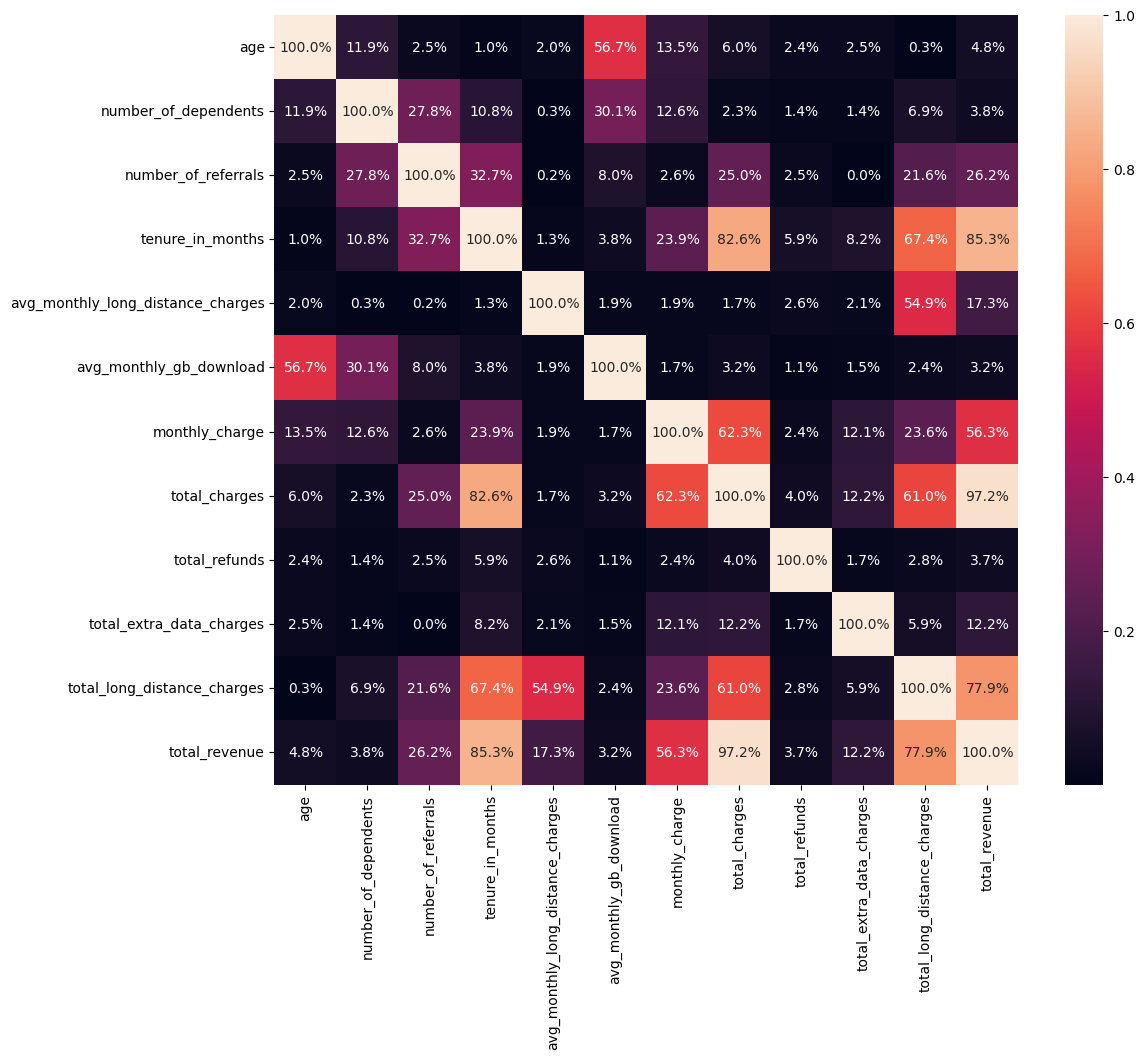

In [ ]:
corr_mat = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%")

print('The Highest Correlation among Features:')
for x in range(len(data.select_dtypes(include=['number']).columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

In [ ]:
data = data.drop(['total_charges'],axis=1)

In [ ]:
from scipy.stats import skew
numeric_data = data.select_dtypes(include=['number'])

# Calculate skewness of numerical features
skewness = numeric_data.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
age                                  0.162152
number_of_dependents                 2.109483
number_of_referrals                  1.445752
tenure_in_months                     0.240491
avg_monthly_long_distance_charges         NaN
avg_monthly_gb_download                   NaN
monthly_charge                      -0.275335
total_charges                        0.963586
total_refunds                        4.327595
total_extra_data_charges             4.090338
total_long_distance_charges          1.238018
total_revenue                        0.919214
dtype: float64


In [ ]:
from scipy.stats import skew
import numpy as np

columns_to_transform = ['number_of_dependents', 'number_of_referrals', 'total_refunds',
                        'total_extra_data_charges', 'total_long_distance_charges']

# Create new columns for sqrt and log transformations
for column in columns_to_transform:
    data[f'{column}_sqrt'] = np.sqrt(data[column])
    data[f'{column}_log'] = np.log1p(data[column])

# Calculate skewness before and after transformations
skewness_before = data[columns_to_transform].apply(skew)
skewness_after_sqrt = data[[f'{column}_sqrt' for column in columns_to_transform]].apply(skew)
skewness_after_log = data[[f'{column}_log' for column in columns_to_transform]].apply(skew)

# Print skewness before and after transformations
print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after square root transformation:")
print(skewness_after_sqrt)
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before transformation:
number_of_dependents           2.109483
number_of_referrals            1.445752
total_refunds                  4.327595
total_extra_data_charges       4.090338
total_long_distance_charges    1.238018
dtype: float64

Skewness after square root transformation:
number_of_dependents_sqrt           1.504378
number_of_referrals_sqrt            0.820510
total_refunds_sqrt                  3.693488
total_extra_data_charges_sqrt       3.271733
total_long_distance_charges_sqrt    0.384645
dtype: float64

Skewness after log transformation:
number_of_dependents_log           1.591194
number_of_referrals_log            0.841921
total_refunds_log                  3.485350
total_extra_data_charges_log       2.853981
total_long_distance_charges_log   -1.108219
dtype: float64


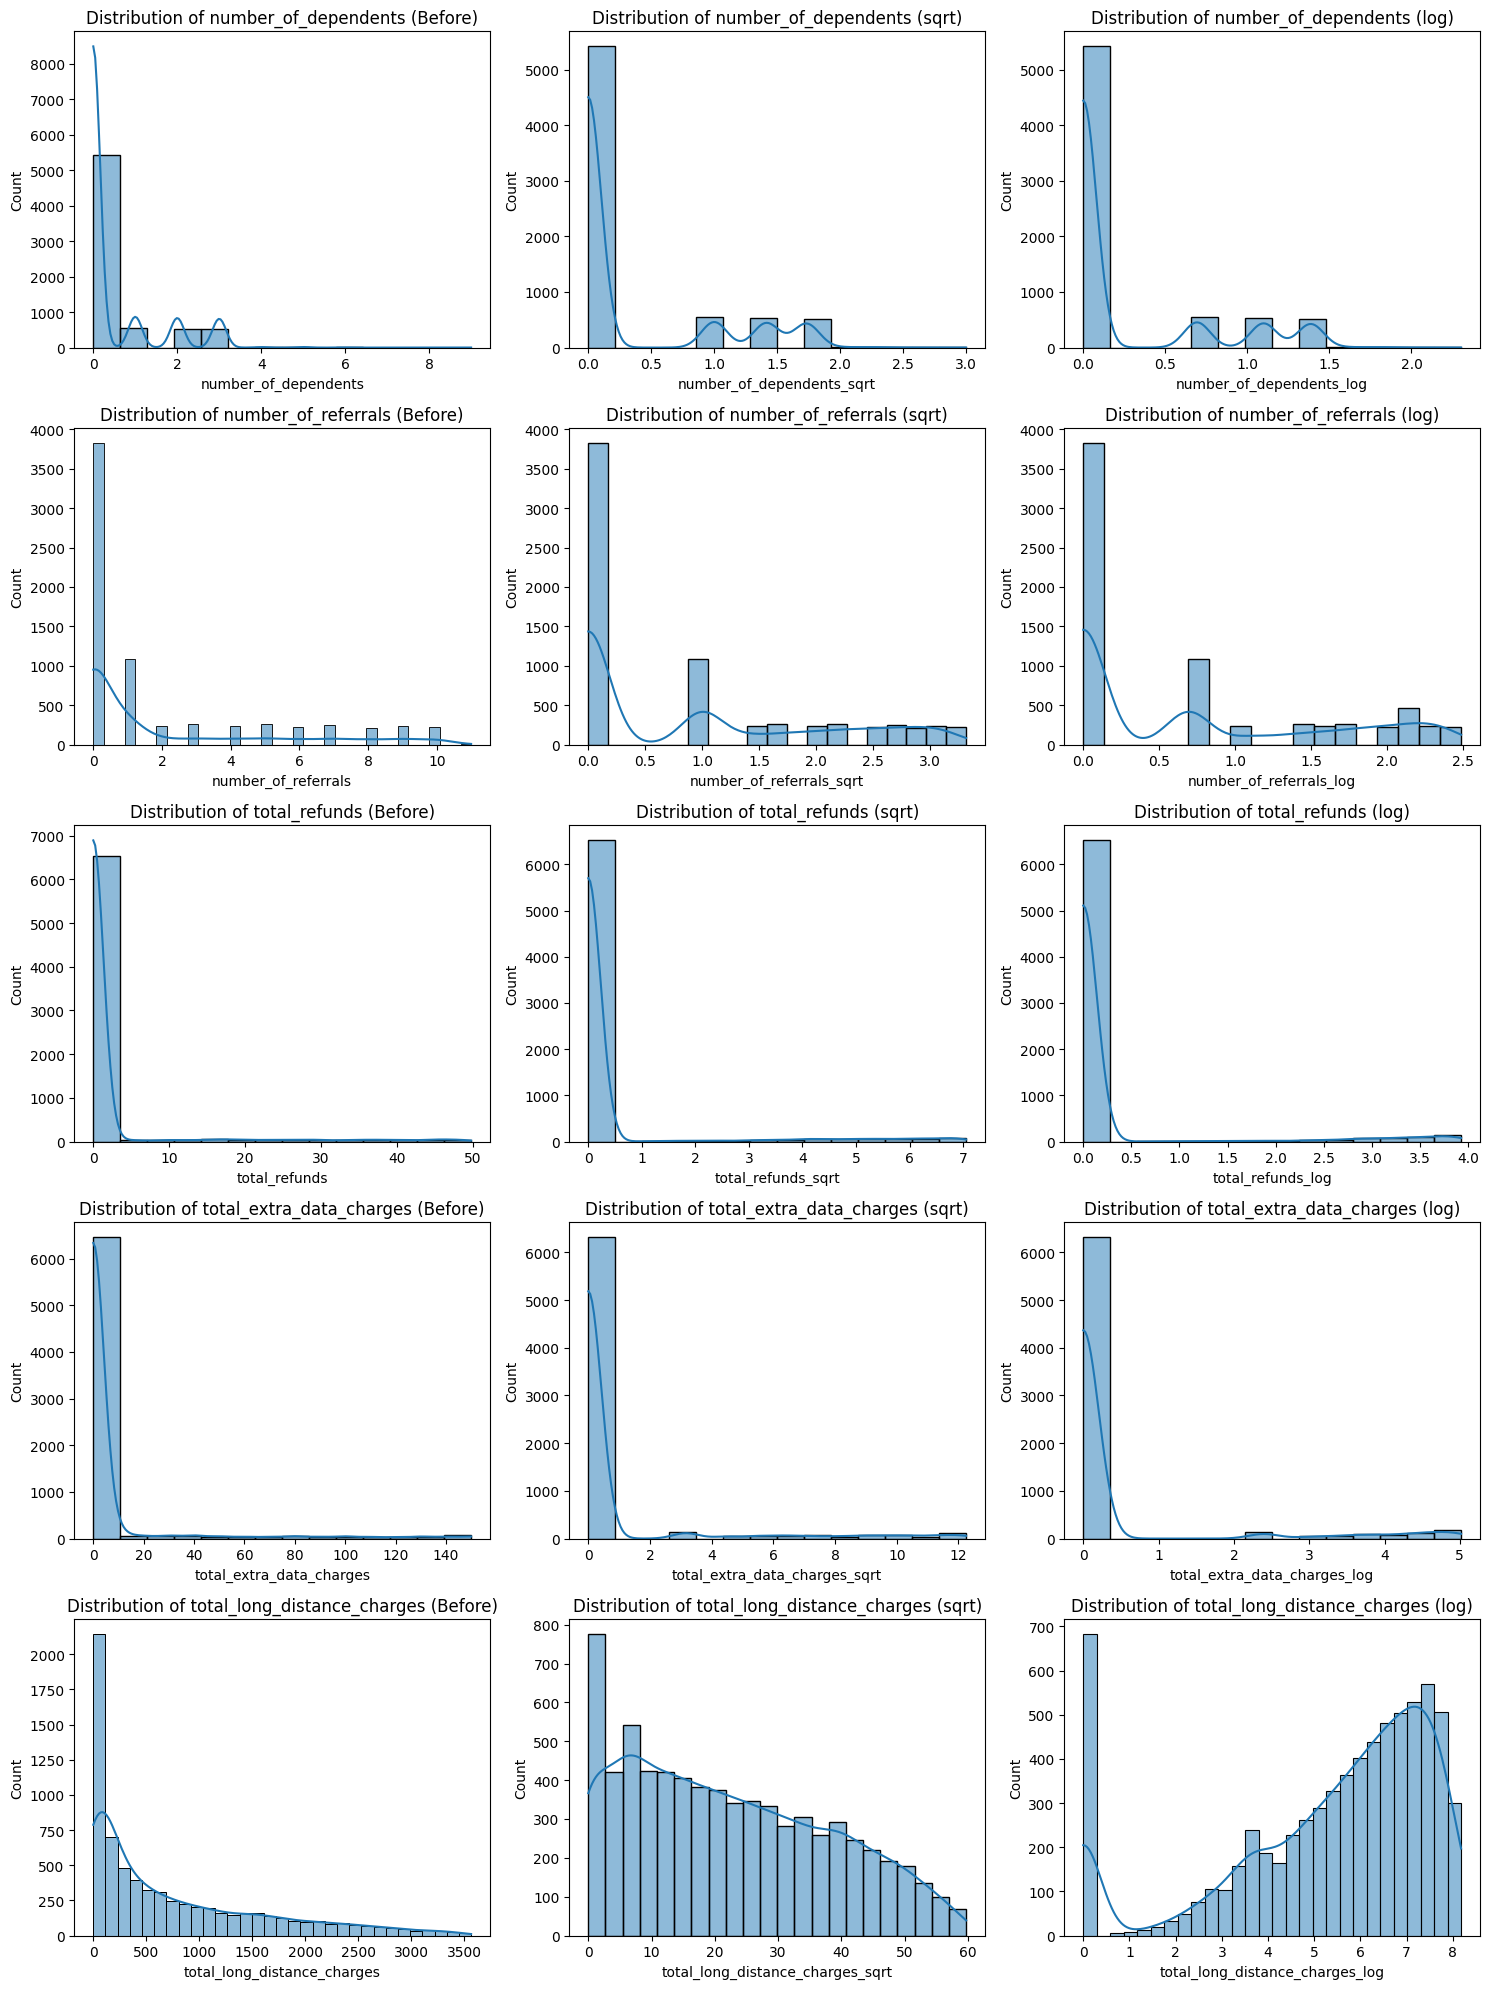

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(columns_to_transform):
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Before)')

    sns.histplot(data[f'{column}_sqrt'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} (sqrt)')

    sns.histplot(data[f'{column}_log'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {column} (log)')

plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(['number_of_dependents', 'number_of_dependents_log',
                  'number_of_referrals', 'number_of_referrals_log',
                  'total_refunds', 'total_refunds_sqrt',
                  'total_extra_data_charges', 'total_extra_data_charges_sqrt',
                  'total_long_distance_charges', 'total_long_distance_charges_log'], axis=1)

null values in nominal features:
gender                       0
married                      0
offer                     3877
phone_service                0
multiple_lines             682
internet_service             0
internet_type             1526
online_security           1526
online_backup             1526
device_protection_plan    1526
premium_tech_support      1526
streaming_tv              1526
streaming_movies          1526
streaming_music           1526
unlimited_data            1526
contract                     0
paperless_billing            0
payment_method               0
customer_status              0
dtype: int64


<Axes: >

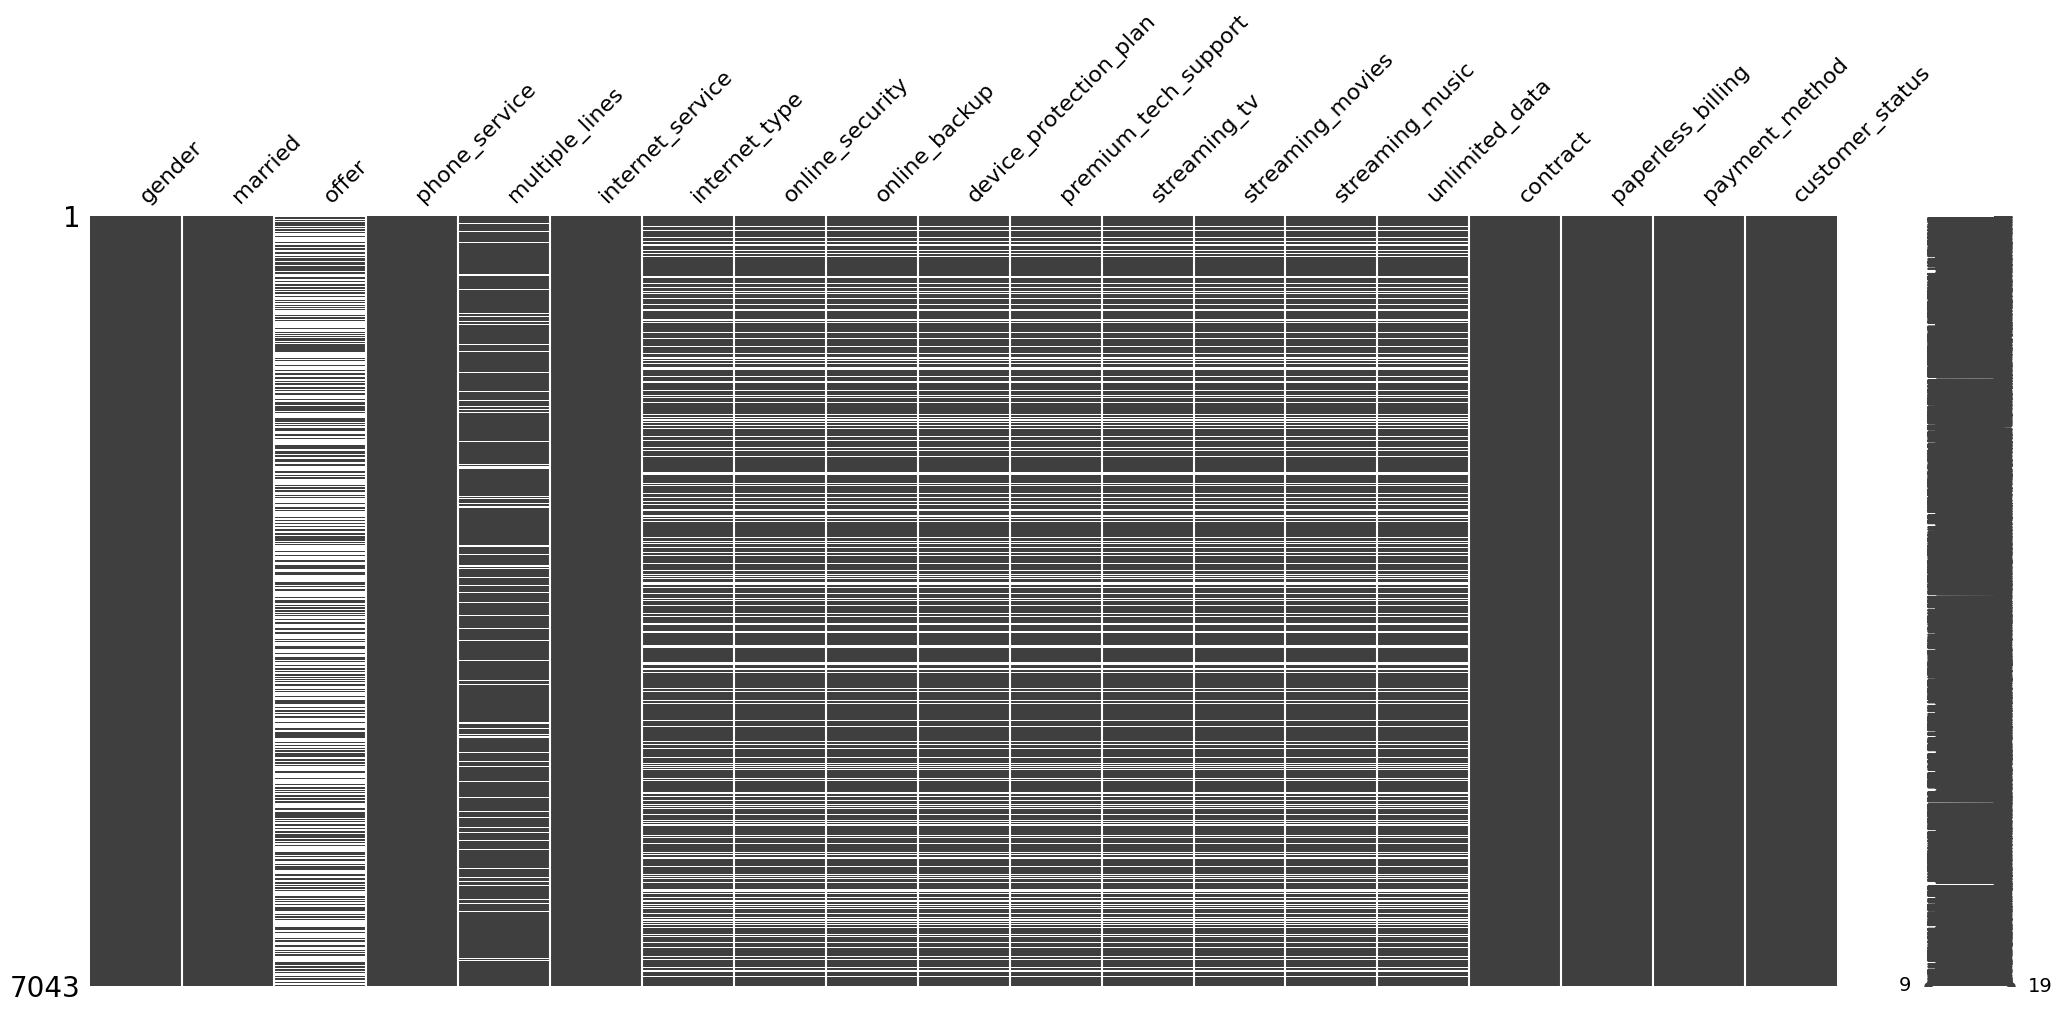

In [ ]:
import missingno as msno

print(f"null values in nominal features:\n{data.select_dtypes(include=['object']).isna().sum()}")
msno.matrix(data.select_dtypes(include=['object']))

In [ ]:
data['internet_type'] = data['internet_type'].apply(lambda x: 'no_internet_service' if pd.isnull(x) else x)
data['offer'] = data['offer'].apply(lambda x: 'no_offer' if pd.isnull(x) else x)

column_name = ['online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support',
               'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']
for column in column_name:
  data[column] = data[column].apply(lambda x: 'no_internet_service' if pd.isnull(x) else x)

<Axes: >

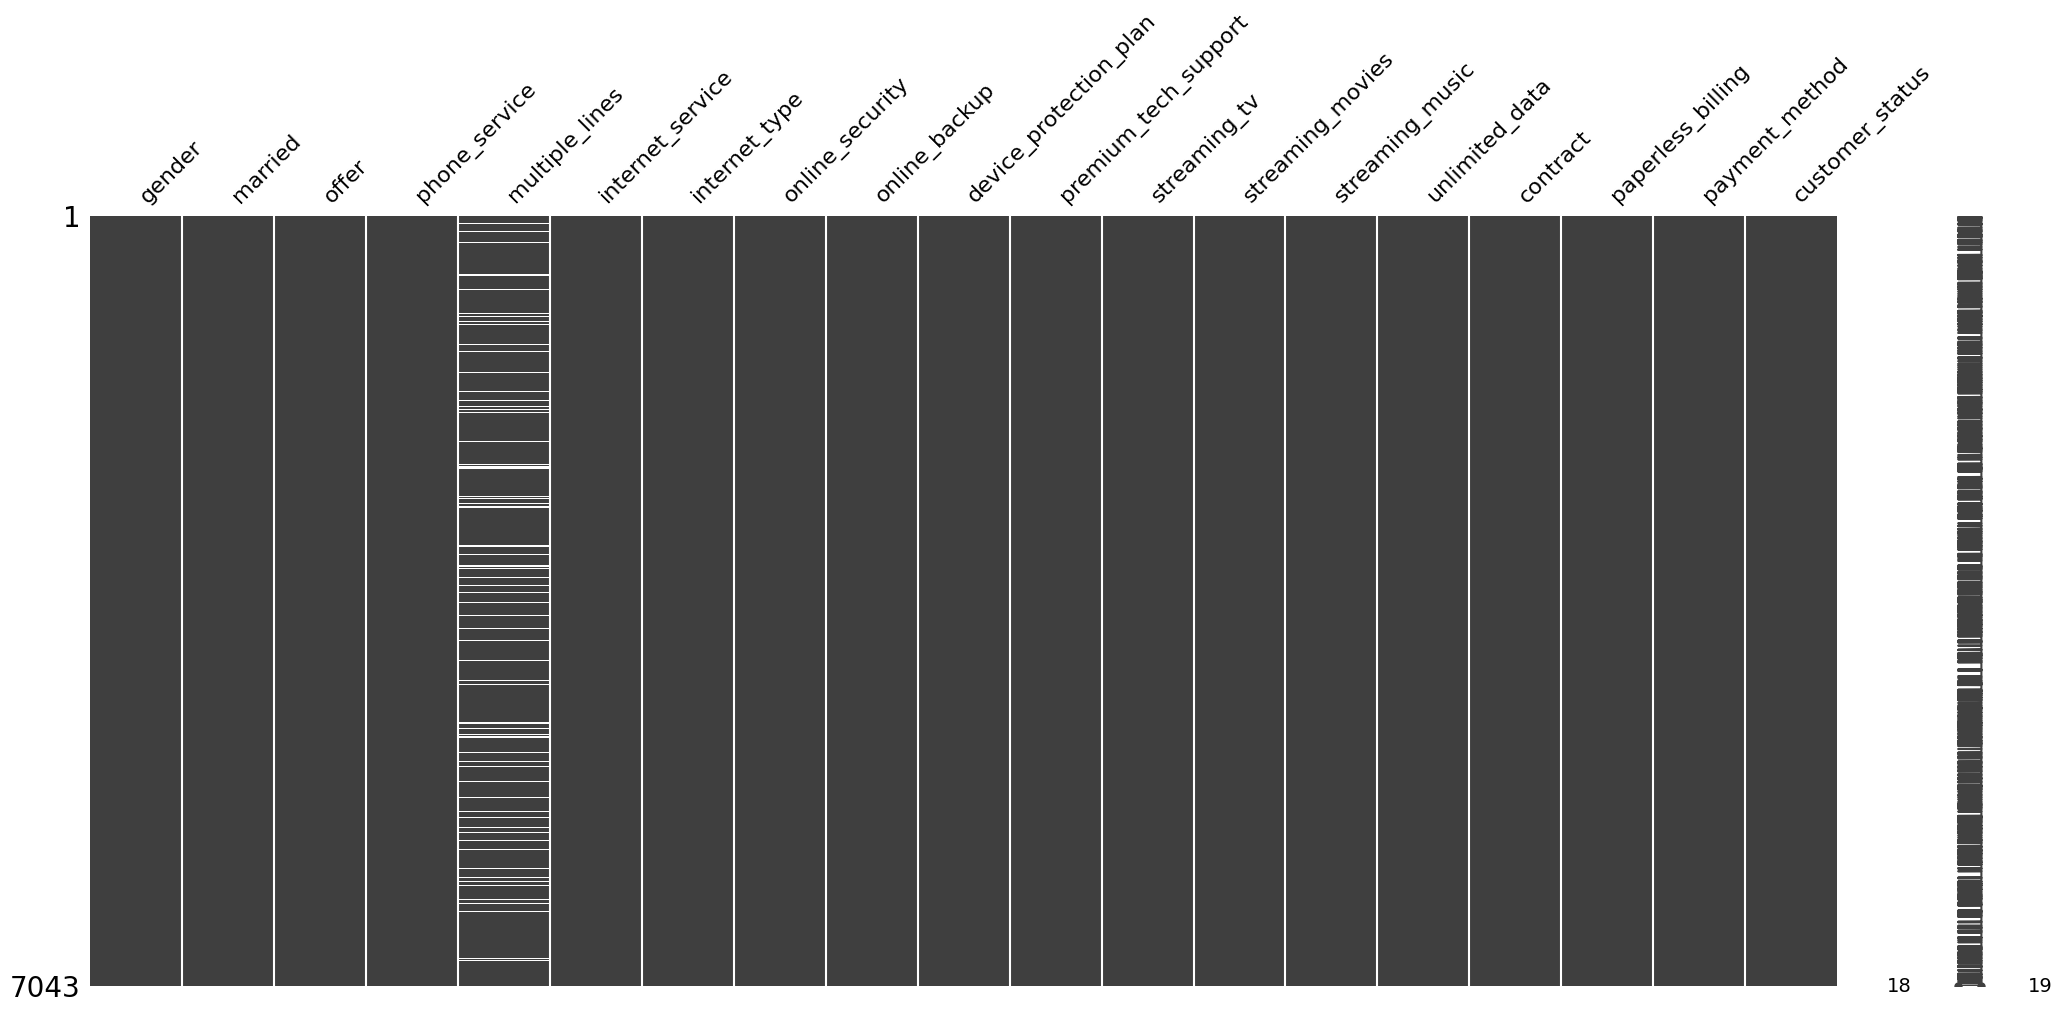

In [ ]:
msno.matrix(data.select_dtypes(include=['object']))


In [ ]:
print("null values in numerical features:\n",data.select_dtypes(include=['number']).isna().sum())

null values in numerical features:
 age                                     0
tenure_in_months                        0
avg_monthly_long_distance_charges     682
avg_monthly_gb_download              1526
monthly_charge                          0
total_charges                           0
total_revenue                           0
number_of_dependents_sqrt               0
number_of_referrals_sqrt                0
total_refunds_log                       0
total_extra_data_charges_log            0
total_long_distance_charges_sqrt        0
dtype: int64


In [ ]:
column_name = ['avg_monthly_long_distance_charges', 'avg_monthly_gb_download']
for column in column_name:
  data[column] = data[column].apply(lambda x: 0 if pd.isnull(x) else x)

null values in numerical features:
 age                                  0
tenure_in_months                     0
avg_monthly_long_distance_charges    0
avg_monthly_gb_download              0
monthly_charge                       0
total_charges                        0
total_revenue                        0
number_of_dependents_sqrt            0
number_of_referrals_sqrt             0
total_refunds_log                    0
total_extra_data_charges_log         0
total_long_distance_charges_sqrt     0
dtype: int64


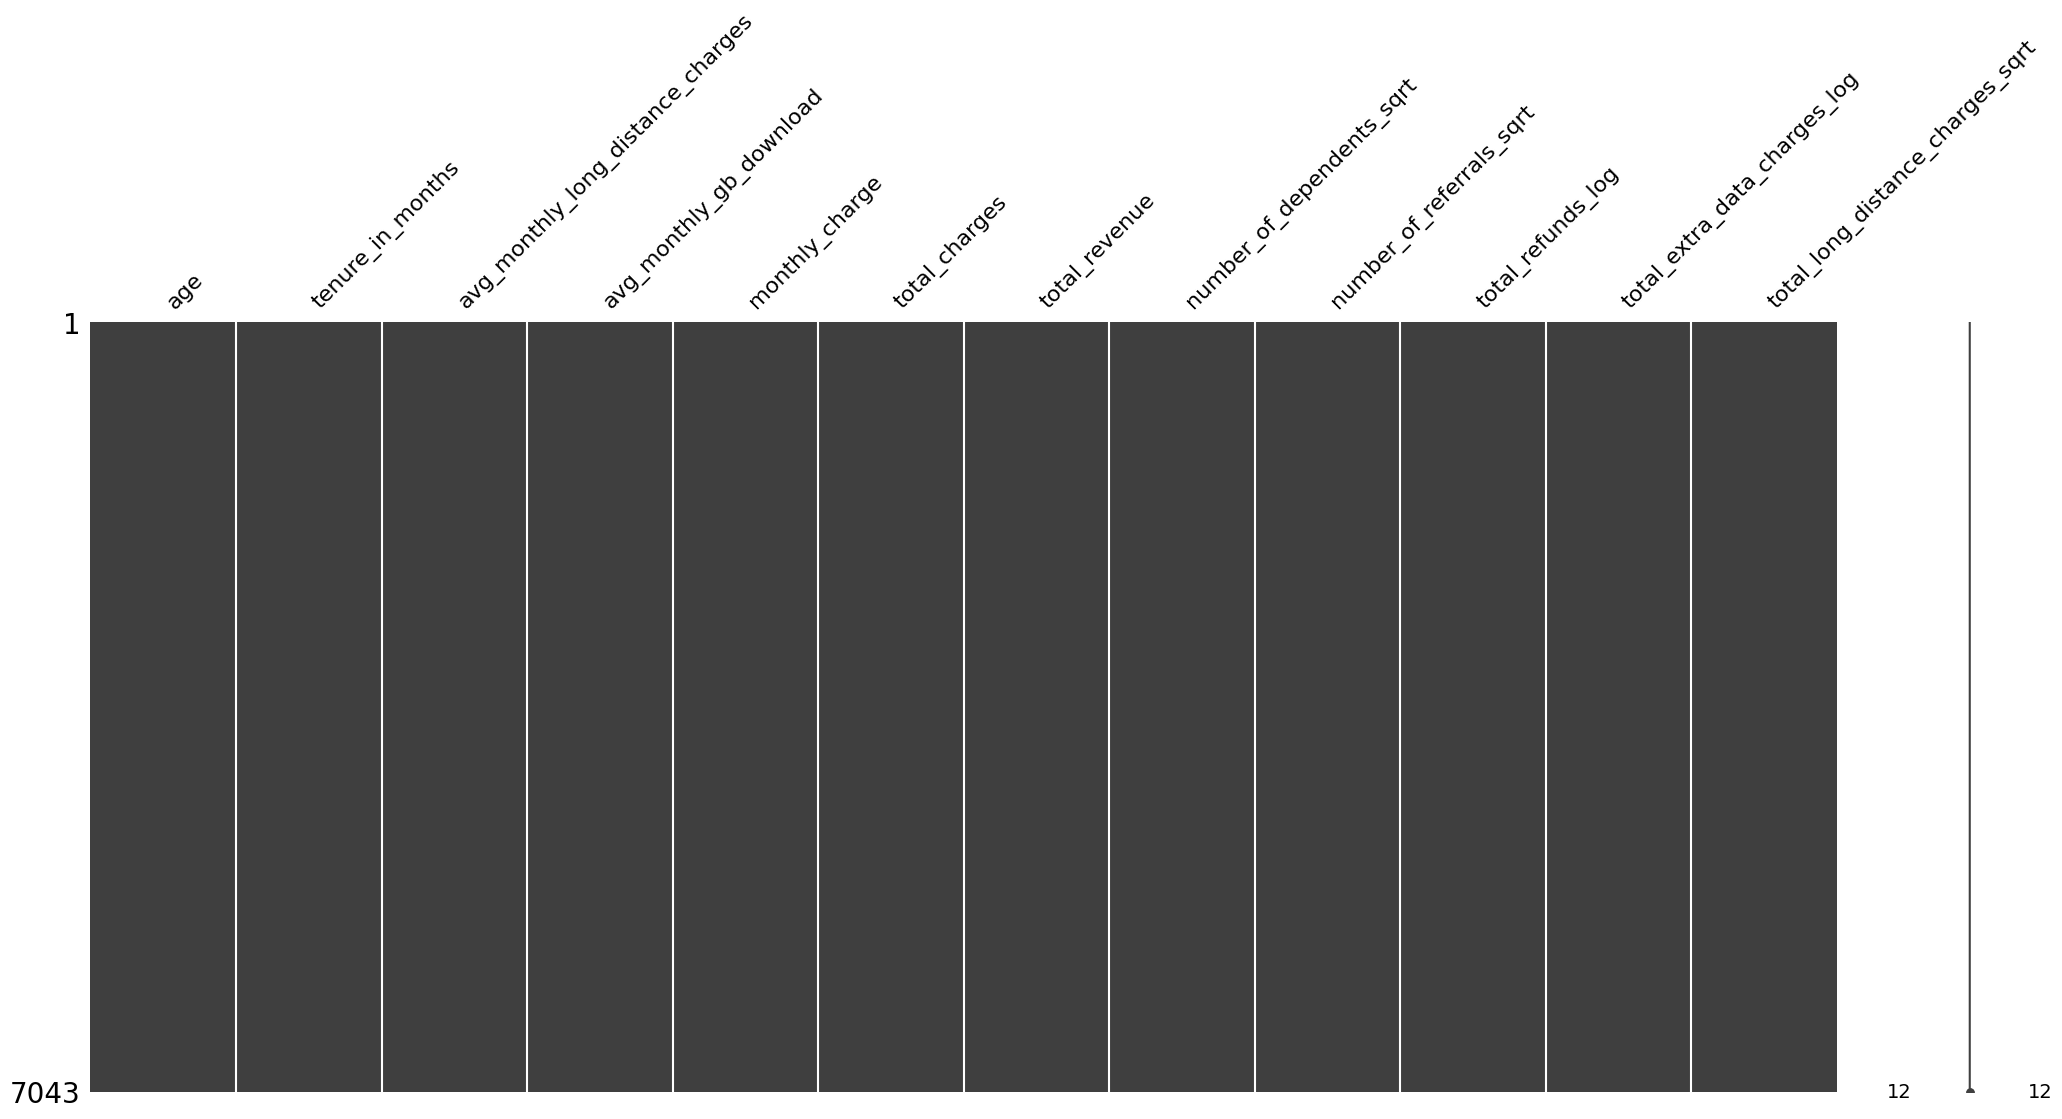

In [ ]:
msno.matrix(data.select_dtypes(include=['number']))
print("null values in numerical features:\n",data.select_dtypes(include=['number']).isna().sum())

In [ ]:
from sklearn.preprocessing import LabelEncoder
# first step:
conversion_dict = {"Yes": 1, "No": 0}
data['multiple_lines'] = data['multiple_lines'].map(conversion_dict)

# second step: labeling the target by using LabelEncoder
label_encoder = LabelEncoder()
data['customer_status'] = label_encoder.fit_transform(data['customer_status'])

# third step: using pd.get_dummies for other features
data = pd.get_dummies(data, drop_first=True)



In [ ]:
data.columns

Index(['age', 'tenure_in_months', 'avg_monthly_long_distance_charges',
       'multiple_lines', 'avg_monthly_gb_download', 'monthly_charge',
       'total_revenue', 'customer_status', 'number_of_dependents_sqrt',
       'number_of_referrals_sqrt', 'total_refunds_log',
       'total_extra_data_charges_log', 'total_long_distance_charges_sqrt',
       'gender_Male', 'married_Yes', 'offer_Offer B', 'offer_Offer C',
       'offer_Offer D', 'offer_Offer E', 'offer_no_offer', 'phone_service_Yes',
       'internet_service_Yes', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_no_internet_service',
       'online_security_Yes', 'online_security_no_internet_service',
       'online_backup_Yes', 'online_backup_no_internet_service',
       'device_protection_plan_Yes',
       'device_protection_plan_no_internet_service',
       'premium_tech_support_Yes', 'premium_tech_support_no_internet_service',
       'streaming_tv_Yes', 'streaming_tv_no_internet_service',
       'stream

In [ ]:
from sklearn.impute import KNNImputer
# Extract the label column before imputation
label_column = data['customer_status']
data = data.drop(columns=['customer_status'])

# the KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(data)

# If we want to keep the DataFrame format:
data = pd.DataFrame(data=imputed_data, columns=data.columns)


# Round the imputed values for 'multiple_lines' to get the mode
data['multiple_lines'] = data['multiple_lines'].apply(lambda x: round(x))

# Reattach the label column
data['customer_status'] = label_column


<Axes: >

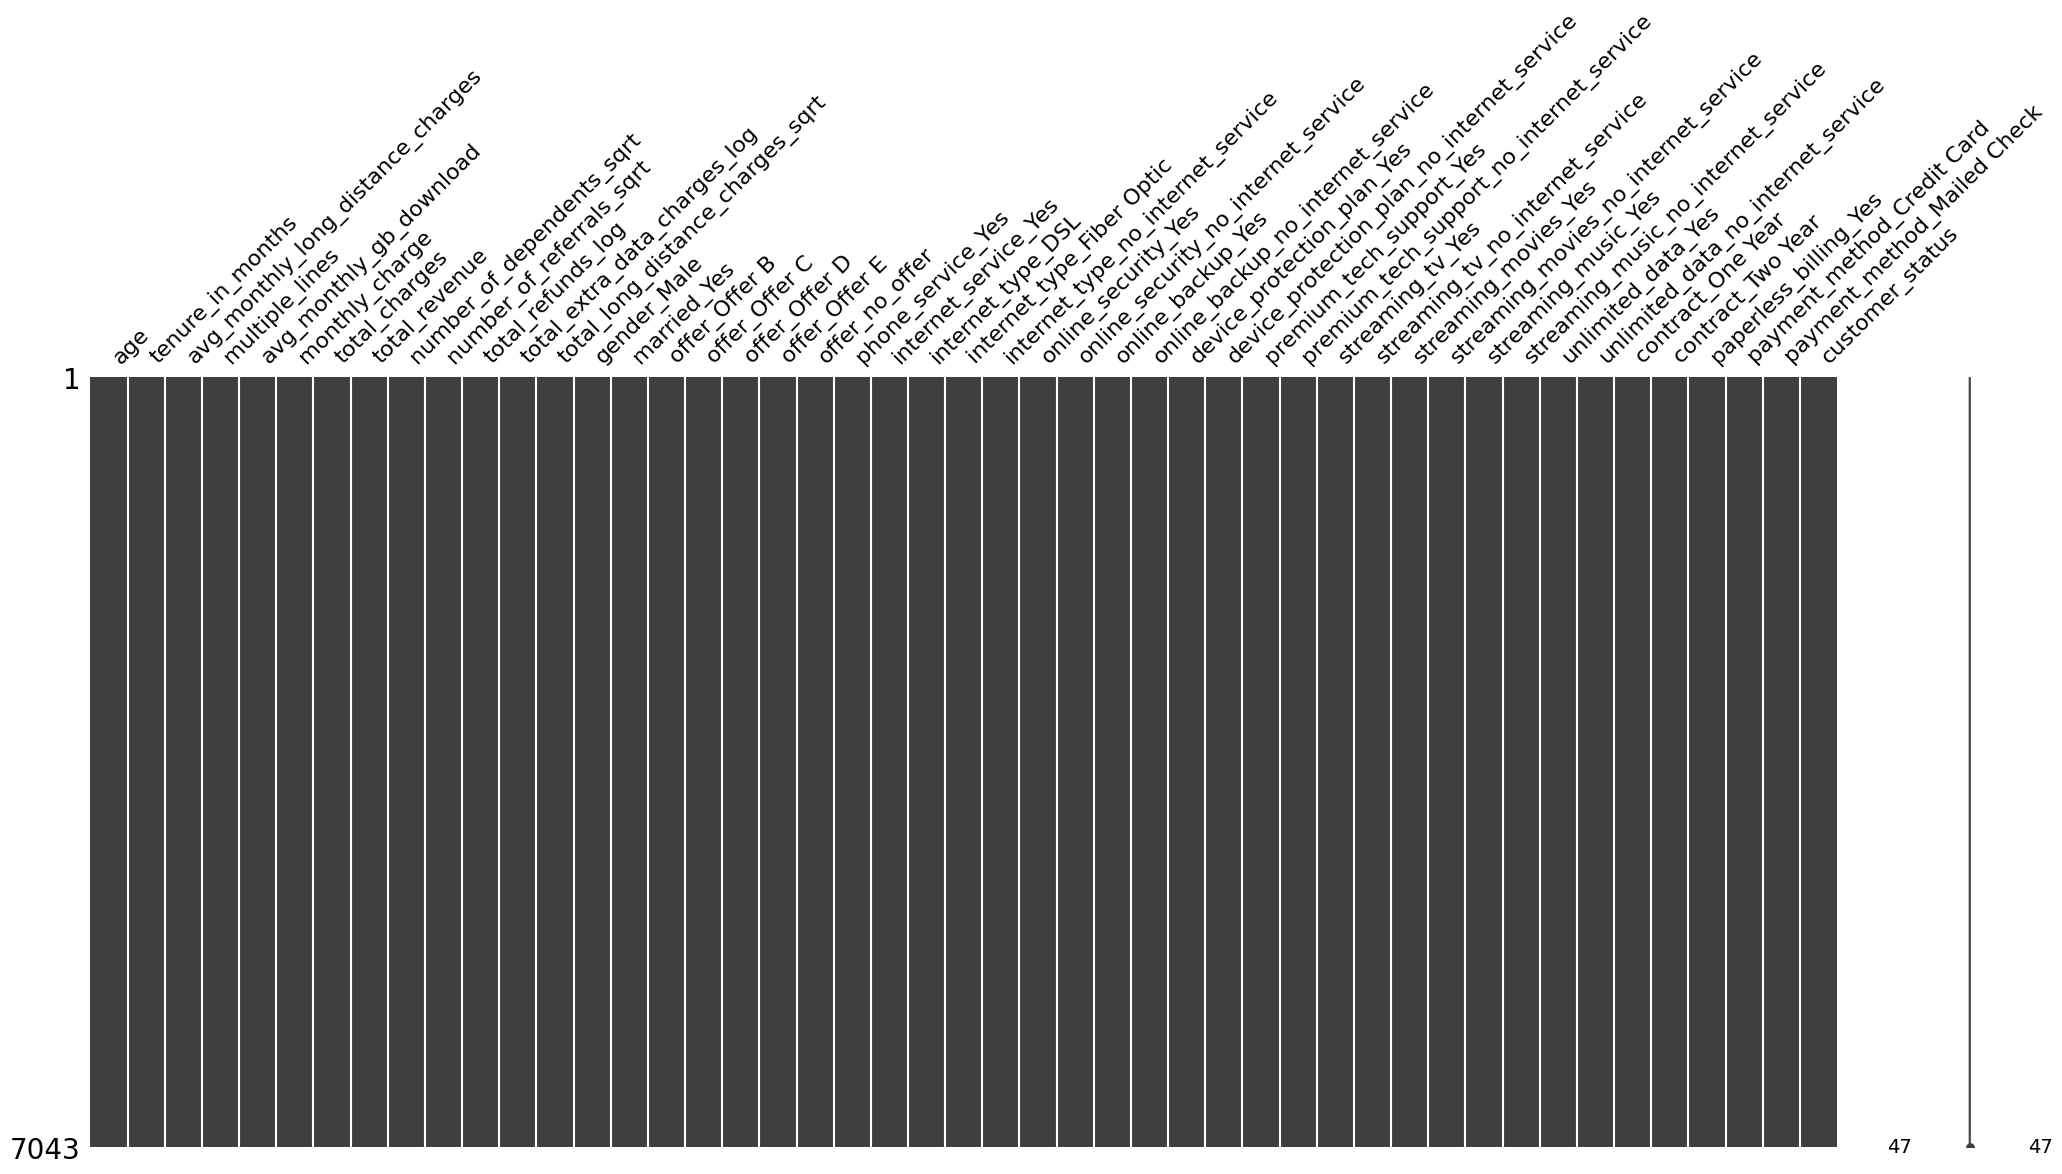

In [ ]:
msno.matrix(data)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['customer_status'], axis=1)
y = data.loc[:, 'customer_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=data.customer_status)

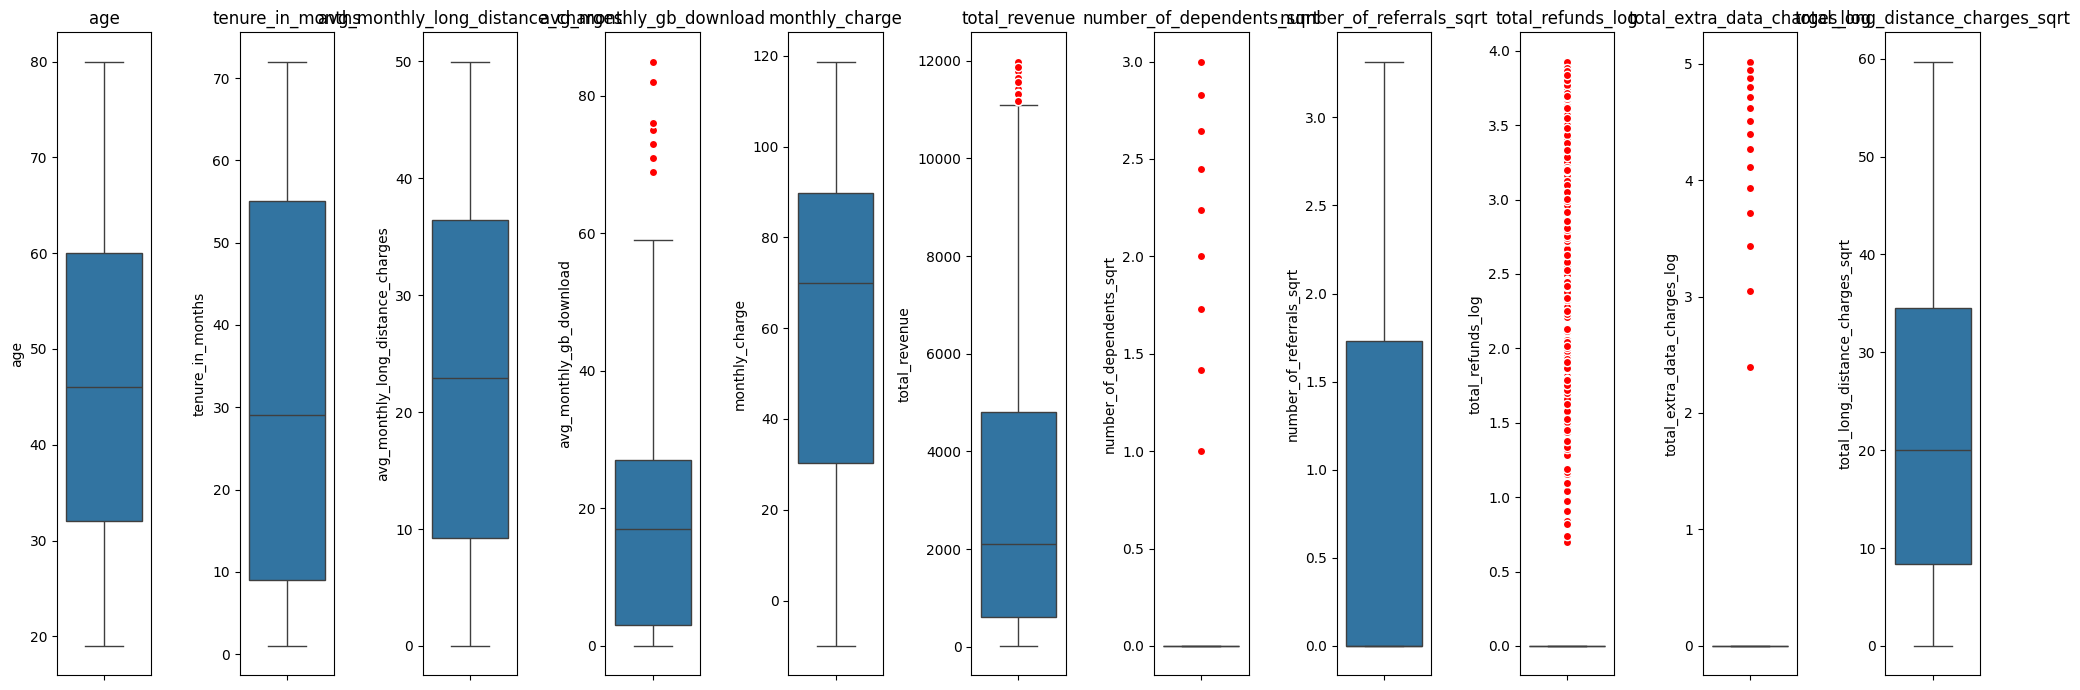

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

numerical_columns = ['age', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge',
                  'total_revenue', 'number_of_dependents_sqrt', 'number_of_referrals_sqrt', 'total_refunds_log',
                  'total_extra_data_charges_log', 'total_long_distance_charges_sqrt']

# Create boxplots for numerical columns
num_plots = len(numerical_columns)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 7))

for index, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[index], flierprops=red_circle)
    axes[index].set_ylabel(col)
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outlier_detection = data[numerical_columns]
for k, v in outlier_detection.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(outlier_detection)[0]
        print(f'Column :{k}')
        print(f"Number of Outliers = {len(outliers)}","||",f"Max Outlier Value = {outliers.max()}",
              "||", f"Min Outlier Value = {outliers.min()}", "||", f"Percentage of Outliers = {perc:.2f}%")
        print("\n")

Column :age
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :tenure_in_months
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :avg_monthly_long_distance_charges
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :avg_monthly_gb_download
Number of Outliers = 362 || Max Outlier Value = 85.0 || Min Outlier Value = 69.0 || Percentage of Outliers = 5.14%


Column :monthly_charge
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :total_revenue
Number of Outliers = 21 || Max Outlier Value = 11979.34 || Min Outlier Value = 11169.77 || Percentage of Outliers = 0.30%


Column :number_of_dependents_sqrt
Number of Outliers = 1627 || Max Outlier Value = 3.0 || Min Outlier Value = 1.0 || Percentage of Outliers = 23.10%




In [ ]:
def handle_outliers(X_train, X_test, columns):
    for col in columns:
        Q1 = np.percentile(X_train[col], 25)
        Q3 = np.percentile(X_train[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Handling outliers in X_train
        X_train[col] = np.where(X_train[col] < lower_bound, lower_bound, X_train[col])
        X_train[col] = np.where(X_train[col] > upper_bound, upper_bound, X_train[col])

        # Handling outliers in X_test based on X_train IQR
        X_test[col] = np.where(X_test[col] < lower_bound, lower_bound, X_test[col])
        X_test[col] = np.where(X_test[col] > upper_bound, upper_bound, X_test[col])

    return X_train, X_test


# Define the columns to apply outlier handling
columns_to_handle = ['avg_monthly_gb_download', 'total_revenue', 'number_of_dependents_sqrt',
                     'total_refunds_log', 'total_extra_data_charges_log']

# Apply the function to the specified columns
X_train, X_test = handle_outliers(X_train, X_test, columns_to_handle)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [ ]:
# Count the values of y_train
y_train_counts = pd.Series(y_train).value_counts()

print("Counts of each class in y_train:")
print(y_train_counts)

Counts of each class in y_train:
2    3776
0    1495
1     363
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Define custom sampling strategy
sampling_strategy = {
    0: 3000,   # Class 0 will have 3000 samples
    1: 1000,   # Class 1 will have only 1000 samples (reduced importance)
    2: 3776    # Class 2 stays the same as it was originally the highest
}

smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


Original dataset shape: Counter({np.int64(2): 3776, np.int64(0): 1495, np.int64(1): 363})
Resampled dataset shape: Counter({np.int64(2): 3514, np.int64(0): 2734, np.int64(1): 992})


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Redefine target names
target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())

# Predictions already made: y_pred_logreg

# Classification Report
print("Classification Report (Logistic Regression):\n")
report = classification_report(y_test, y_pred_logreg, target_names=[target_names[i] for i in labels], output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(3))  # rounded to 3 decimal places

# Confusion Matrix
print("\nConfusion Matrix (Logistic Regression):\n")
cm = confusion_matrix(y_test, y_pred_logreg, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"Actual {target_names[i]}" for i in labels],
                        columns=[f"Predicted {target_names[i]}" for i in labels])
print(cm_df)

# Accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"\nAccuracy (Logistic Regression): {logreg_accuracy:.4f}")


Classification Report (Logistic Regression):

              precision  recall  f1-score   support
Churned           0.609   0.754     0.674   374.000
Joined            0.565   0.714     0.631    91.000
Stayed            0.933   0.821     0.873   944.000
accuracy          0.796   0.796     0.796     0.796
macro avg         0.702   0.763     0.726  1409.000
weighted avg      0.823   0.796     0.805  1409.000

Confusion Matrix (Logistic Regression):

                Predicted Churned  Predicted Joined  Predicted Stayed
Actual Churned                282                38                54
Actual Joined                  24                65                 2
Actual Stayed                 157                12               775

Accuracy (Logistic Regression): 0.7963


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Train the Random Forest
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Define target names
target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())

# Classification Report
print("Classification Report (Random Forest):\n")
rf_report = classification_report(y_test, y_pred_rf, target_names=[target_names[i] for i in labels], output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
print(rf_report_df.round(3))

# Confusion Matrix (text version)
print("\nConfusion Matrix (Random Forest):\n")
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=labels)
rf_cm_df = pd.DataFrame(rf_cm, index=[f"Actual {target_names[i]}" for i in labels],
                        columns=[f"Predicted {target_names[i]}" for i in labels])
print(rf_cm_df)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy (Random Forest): {rf_accuracy:.4f}")


Classification Report (Random Forest):

              precision  recall  f1-score   support
Churned           0.710   0.668     0.689   374.000
Joined            0.772   0.670     0.718    91.000
Stayed            0.891   0.923     0.906   944.000
accuracy          0.839   0.839     0.839     0.839
macro avg         0.791   0.754     0.771  1409.000
weighted avg      0.835   0.839     0.836  1409.000

Confusion Matrix (Random Forest):

                Predicted Churned  Predicted Joined  Predicted Stayed
Actual Churned                250                18               106
Actual Joined                  29                61                 1
Actual Stayed                  73                 0               871

Accuracy (Random Forest): 0.8389


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'learning_rate': [0.2],
    'max_depth': [7],
    'n_estimators': [500],
    'subsample': [1.0],
    'colsample_bytree': [0.8],
}


# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False)



stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=stratified_kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'
)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search_xgb.best_params_
best_score = grid_search_xgb.best_score_

print(f"Best parameters in XGBoost: {best_params}")
print(f"Best cross-validation score in XGBoost: {best_score:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters in XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1.0}
Best cross-validation score in XGBoost: 0.8862


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Get the best model from grid search
best_model = grid_search_xgb.best_estimator_

# 2. Predict on the test set
y_pred = best_model.predict(X_test)

# 3. Define target labels (you can customize these names if needed)
target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())


# 7. Classification Report (optional, but useful)
print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test, y_pred, target_names=[target_names[i] for i in labels]))


# 4. Confusion Matrix (text version)
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm,
                     index=[f"Actual {target_names[i]}" for i in labels],
                     columns=[f"Predicted {target_names[i]}" for i in labels])

print("\nConfusion Matrix (XGBoost):\n")
print(cm_df)


# 6. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (XGBoost): {accuracy:.4f}")





Classification Report (XGBoost):

              precision    recall  f1-score   support

     Churned       0.71      0.68      0.69       374
      Joined       0.72      0.66      0.69        91
      Stayed       0.90      0.92      0.91       944

    accuracy                           0.84      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.84      0.84      0.84      1409


Confusion Matrix (XGBoost):

                Predicted Churned  Predicted Joined  Predicted Stayed
Actual Churned                255                23                96
Actual Joined                  31                60                 0
Actual Stayed                  75                 0               869

Accuracy (XGBoost): 0.8403


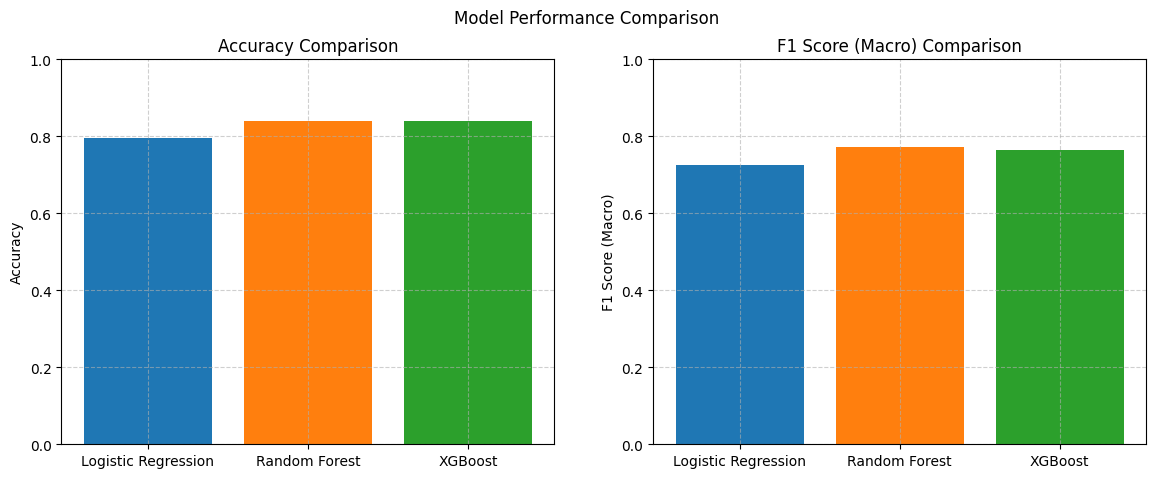

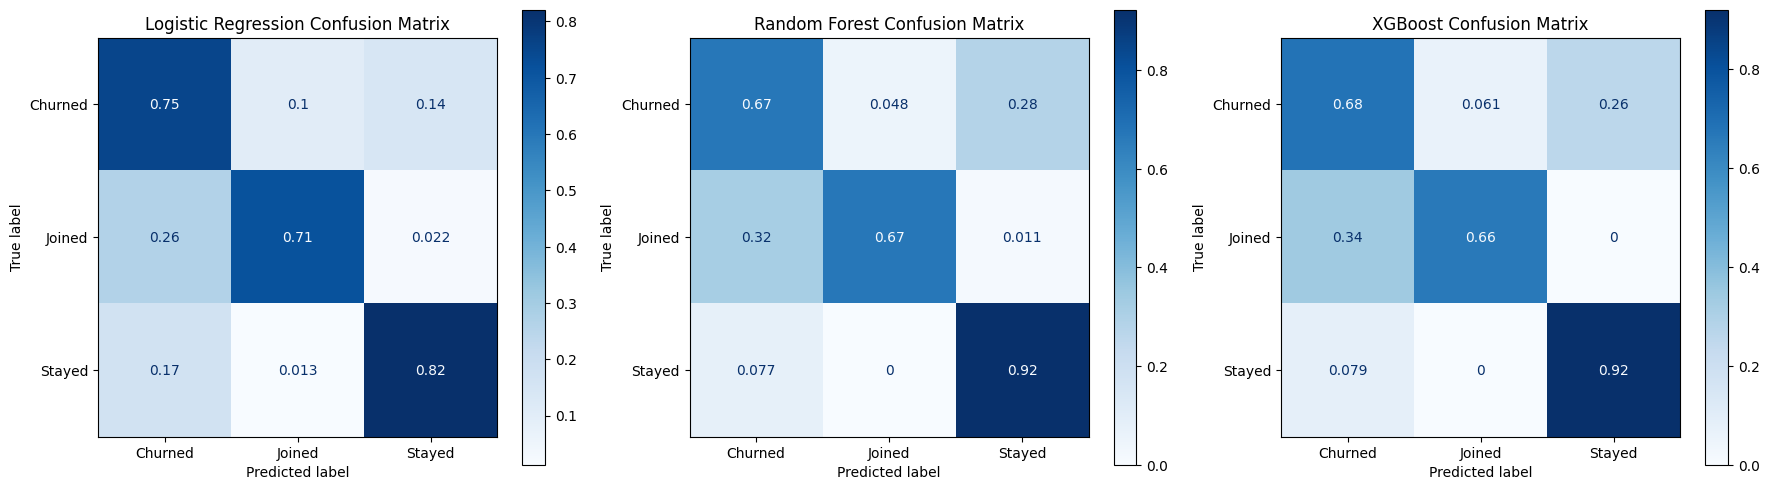

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
y_preds = [y_pred_logreg, y_pred_rf, y_pred]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())

accuracy_scores = {}
f1_scores = {}

for model_name, y_pred_model in zip(model_names, y_preds):
    accuracy = accuracy_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model, average='macro')
    accuracy_scores[model_name] = accuracy
    f1_scores[model_name] = f1

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
axs[0].set_title('Accuracy Comparison')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Accuracy')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].bar(f1_scores.keys(), f1_scores.values(), color=colors)
axs[1].set_title('F1 Score (Macro) Comparison')
axs[1].set_ylim(0, 1)
axs[1].set_ylabel('F1 Score (Macro)')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model Performance Comparison')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model_name, y_pred_model, color in zip(axes, model_names, y_preds, colors):
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred_model,
        labels=labels,
        display_labels=[target_names[i] for i in labels],
        cmap=plt.cm.Blues,
        ax=ax,
        normalize='true'
    )
    ax.set_title(f"{model_name} Confusion Matrix")

plt.tight_layout()
plt.show()
